Pythonライブラリ https://docs.python.jp/3.5/library/index.html  
Pythonドキュメント集 https://docs.python.jp/3.5/index.html   
Jupyter http://jupyter.org/index.html

https://qiita.com/sci_Haru/items/960687f13962d63b64a0  
 https://qiita.com/sci_Haru/items/6b80c7eb8d4754fb5c2d  
 https://qiita.com/sci_Haru/items/b98791f232b93690a6c3　SOR法・ガウス-ザイデル法・ヤコビ法の収束速度の比較  
 https://qiita.com/chase0213/items/95a107c013e4a6dbd7b5 scipy で2階常微分方程式の数値解を求める  
 Scipy Lecture Notes  http://www.turbare.net/transl/scipy-lecture-notes/index.html  
 ２次元定常熱伝導における基礎方程式 http://www.kz.tsukuba.ac.jp/~abe/ohp-heat/chapter3.pdf  
 http://www.oishi.info.waseda.ac.jp/~takayasu/classes/slides/sim_heat4.pdf  

# 第4回
リクエストがあったので微分方程式の数値解法について  


1. 微分方程式の解法  
2. 常微分方程式の数値的解法  
3. 偏微分方程式の数値的解法


# 微分方程式の解法

解析解　・・・・解析的に求める。つまり理論的・代数的に算出できる解

数値解　・・・・初期値から始めてある刻み幅で次の数値を順々に求める解

                →　方程式を「差分近似」して離散化して計算 
___

# 1. 常微分方程式の数値的解法

常微分方程式の数値的解法は**Euler法**と**Runge-Kutta法**でほぼ解ける
___

## 1.1 Euler法（Euler method）



微分方程式 $\frac{dy(t)}{dt}=f(t,y)$と初期値$y(t_0)=y_0$が与えられたとき、

$y(x_0)=y_0$  
$y_1=y_0+f(x_0,y_0)\times h$

を用いて漸化的にy(t)を求める方法である。  
つまり、近似を順次繰り返して初期値から順にyを求める。

手順
⑴　各変数について初期値を決める  
    刻み幅　$h $  
    速度の初期値$v_{f0}$  
    
⑵　

*Euler法を用いた下記コードは「Pythonによる数値計算とシミュレーション」小高知宏著のP27 を参考に一部改変

初速度v0を入力してください:10
初期高度x0を入力してください:100
0.0 100.0 10.0


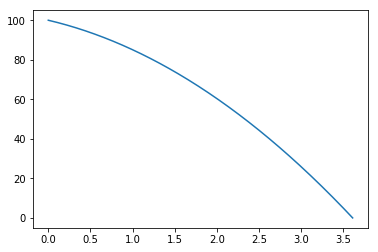

In [141]:
# -*- coding: utf-8 -*-
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt

# 定数
G = 9.80 # 重力加速度

# メイン実行部
t = 0.0   # 時刻t
h = 0.01  # 時刻の刻み幅

# 係数の入力
v = float(input("初速度v0を入力してください:"))
x = float(input("初期高度x0を入力してください:"))
print("{:.1f} {:.1f} {:.1f}".format(t, x, v))  # 現在時刻と現在の位置
# グラフデータに現在位置を追加
tlist = [t]
xlist = [x]

# 自由落下の計算
while x >= 0:   # 地面に達するまで計算
    t += h      # 時刻の更新
    v += G * h  # 速度の計算
    x -= v * h  # 位置の更新
#    print("{:.2f} {:.2f} {:.2f}".format(t, x, v))  # 現在時刻と現在の位置
    # グラフデータに現在位置を追加
    tlist.append(t)
    xlist.append(x)
# グラフの表示
plt.plot(tlist, xlist)  # グラフをプロット
plt.show()
# gfreefall.pyの終わり



# 1.2 Runge-Kutta法

** 4次のRunge-Kutta法の公式 **  

$\frac{dy}{dx}=f(x,y)$ただし$f(x_0)=y_0$ について
刻み幅$h$で$x_n=x_0+nh$を求め  
これに対応する$y$の値$y_n$が求まると$y_{n+1}$の値が次のように求まる  

$y_{n+1}$= $y_n+k_1/6+k_2/3+k_3/3+k_4/6$

ただし、  
  $k_1=hf(x_n,y_n) $  
   $k_2=hf(x_n+h/2,y_n+k_1/2) $  
   $k_3=hf(x_n+h/2,y_n+k_2/2)  $  
   $k_4=hf(x_n+h,y_n+k_3)  $  
   
  このRunge-Kutta法を上記に適応

初速度v0を入力してください:10
初期高度x0を入力してください:100


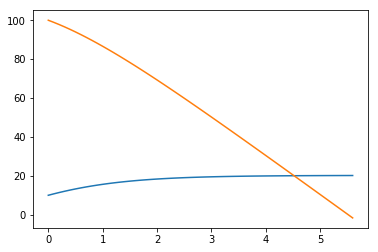

In [146]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 #重力加速度(m/s^2)
k = 0.24 #空気抵抗係数(kg/m)
m = 10.0 #ボール重さ(kg)

def f(v): #関数の定義
    return (m*g-k*v**2)/m

vtrj = [float(input("初速度v0を入力してください:"))] #速度のtrajectory配列
xtrj = [float(input("初期高度x0を入力してください:"))] #位置のtrajectory配列
array_t = [0.0] #時間発展配列

v = vtrj[0] #初期速度
x = xtrj[0] #初期位置
t = array_t[0] #初期時間
h = 0.1e0 #ルンゲクッタ法の刻み幅

#ルンゲクッタ法のメイン計算
while x >= 0.0e0:
    k1 = h*f(v)
    k2 = h*f(v+0.5*k1)
    k3 = h*f(v+0.5*k2)
    k4 = h*f(v+k3)
    v = v + (k1+2*k2+2*k3+k4)/6
    x = x - v*h
    t = t + h
    vtrj = np.append(vtrj,v)
    xtrj = np.append(xtrj,x)
    array_t = np.append(array_t,t)

#グラフ描写
plt.plot(array_t,vtrj)
plt.plot(array_t,xtrj)

# 1.3 scipy で解く
まずはパッケージをインストール
$ pip install scipy 

In [140]:
#-*- coding:utf-8 -*-

import numpy as np
from scipy.integrate import odeint

g = 9.8     # 重力定数
m = 1.0     # 質量
h = float(input("初期高度x0を入力してください:"))     # 初期位置

def f(x, t):
    ret = [
        x[1],      # 第一式の右辺
        -g / m     # 第二式の右辺
    ]
    return ret


def main():
    # 初期状態
    x0 = [
        h,    # 第一式の初期条件
        0     # 第二式の初期条件
    ]

    # 計算するインターバル
    # 引数は、「開始時刻」、「終了時刻」、「刻み」の順
    t = np.arange(0, 10, 0.1)

    # 積分する
    x = odeint(f, x0, t)

    # 結果を表示する（とりあえずそのまま print）
    print(x)


if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'scipy'

## 1.4 Sympyで解析的に解く
Sympyを使用して解析的に解く

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

v = Function('v')
t = Symbol('t')

g = 9.81 #重力加速度(m/s^2)
k = 0.24 #空気抵抗係数(kg/m)
m = 10.0 #ボール重さ(kg)

# dsolve
eq1 = dsolve(v(t).diff(t,1)-(m*g-k*v(t)**2)/m)
print(eq1)

Eq(v(t), -20.2175666191557/tanh(C1 - 0.485221598859738*t))


参考：
sympyのdsolveメソッドを利用して，定数係数2階線形常微分方程式$5y''(x)+4y'(x)+3y(x)=0$の一般解を求める

In [154]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
"""
常微分方程式の一般解を求める
"""
#x = Symbol('x')                  # 文字'x'を変数xとして定義
#y = Symbol('y')                 # 文字 'y'を変数yとして定義

#dsolveにより一般解を求める。
dsolve(5*y(x).diff(x,2)+4*y(x).diff(x,1)+3*y(x))

TypeError: 'Symbol' object is not callable

# 偏微分方程式

２階の偏微分方程式  
（１）楕円型　（ラプラス方程式）  
（２）双曲型（波動方程式）  
（３）放物型（拡散方程式）

# 1次元定常熱伝導方程式

https://www.youtube.com/watch?v=uyynJWS3edI&list=PLe3_YvWzUtsR7U3UUC-91h8WvMBQEbyU0

In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
L=0.1
n = 10
T0 = 0
T1s = 40
T2s = 20
dx = L/n
alpha = 0.0001
t_final = 60
dt = 0.1

In [122]:
x = np.linspace(dx/2, L-dx/2, n)
T = np.ones(n)*T0
dTdt = np.empty(n)
t = np.arange(0,t_final,dt)

In [123]:
    for i in range(1,n-1):
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2+(T[i+1]-T[i])/dx**2)


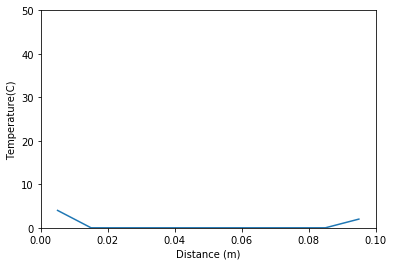

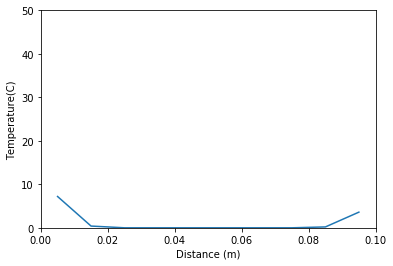

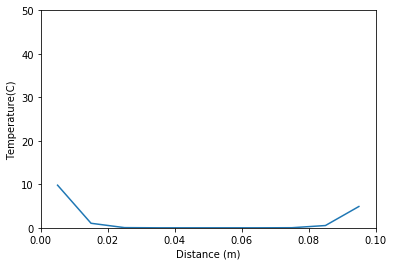

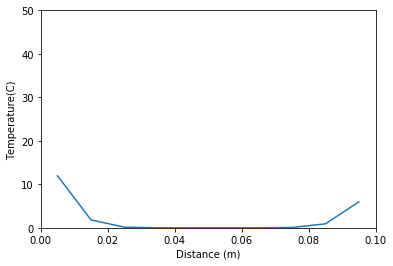

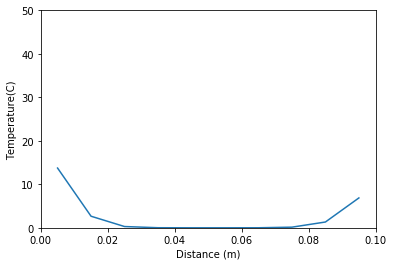

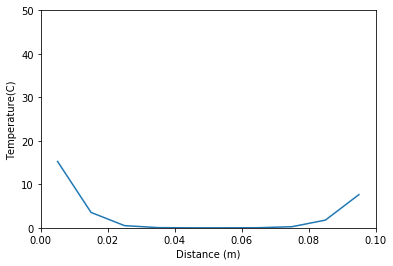

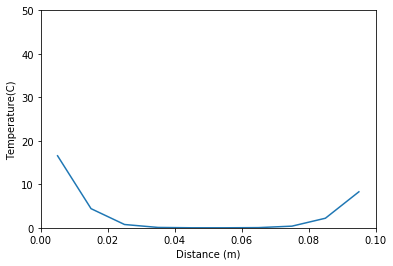

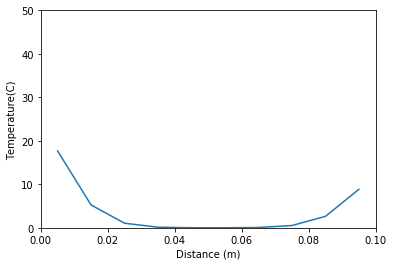

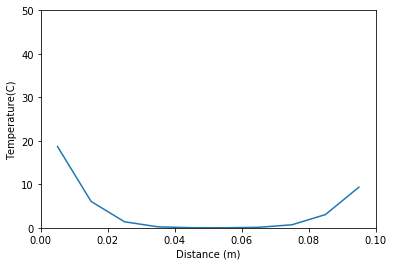

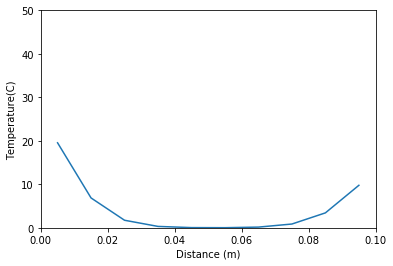

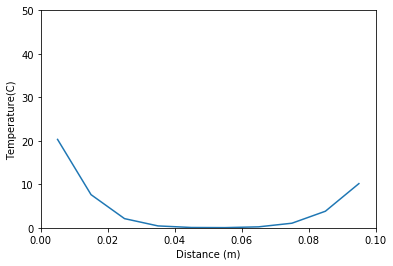

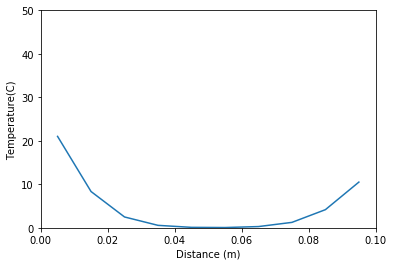

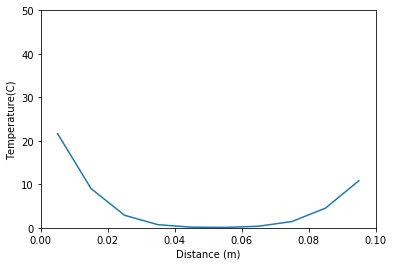

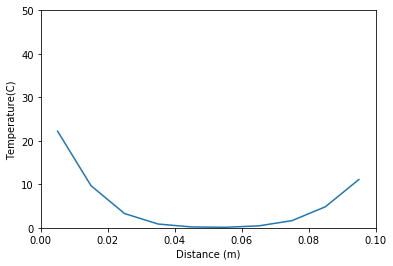

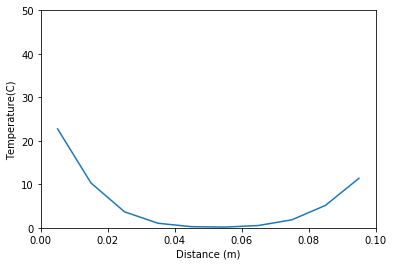

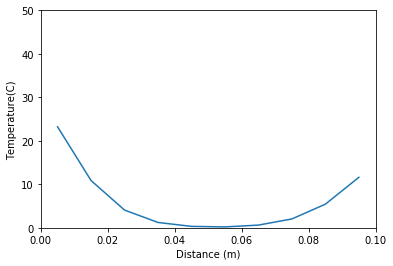

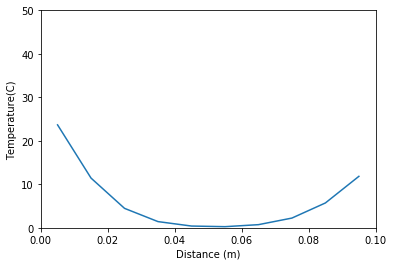

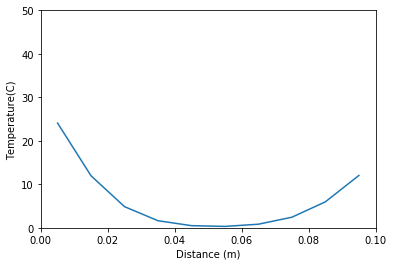

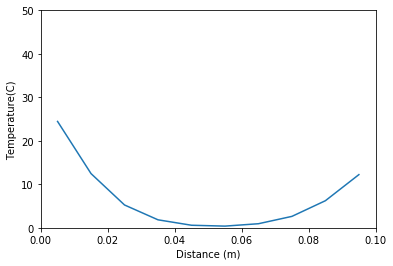

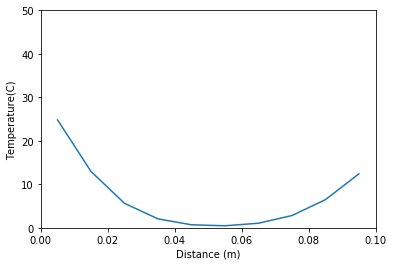

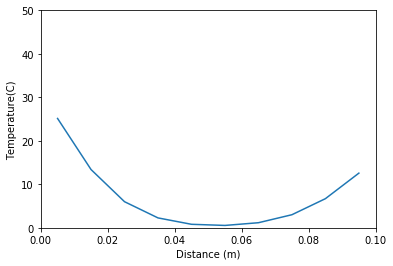

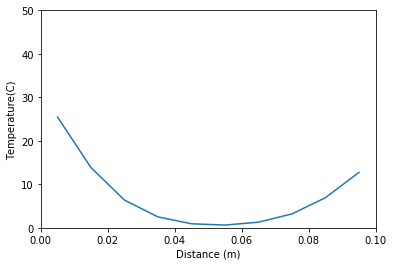

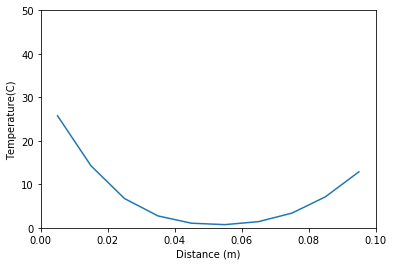

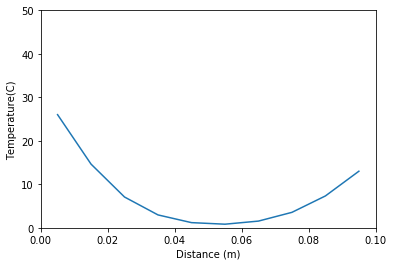

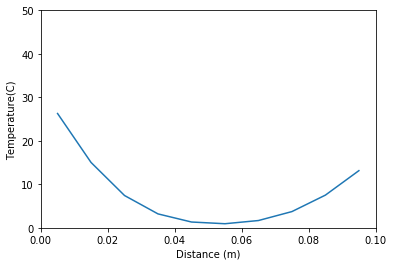

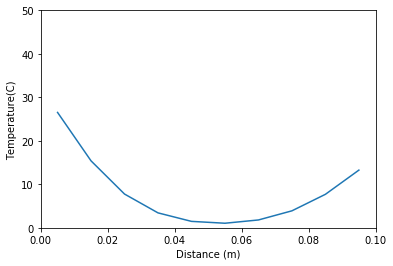

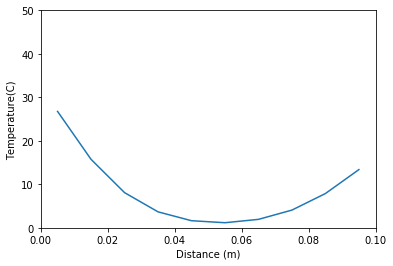

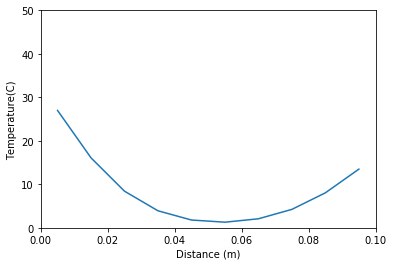

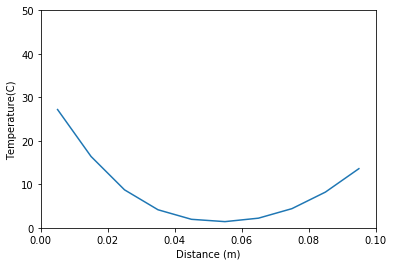

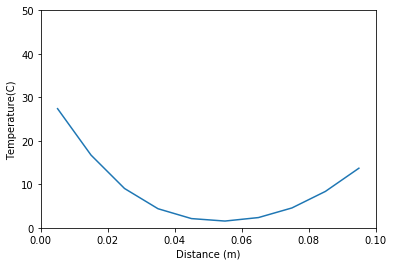

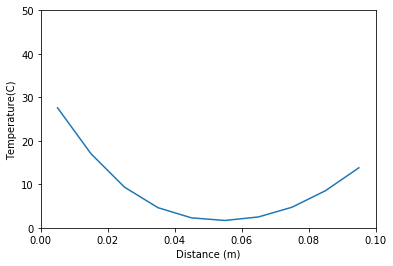

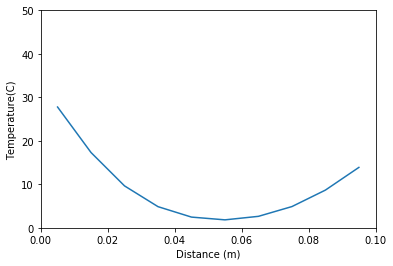

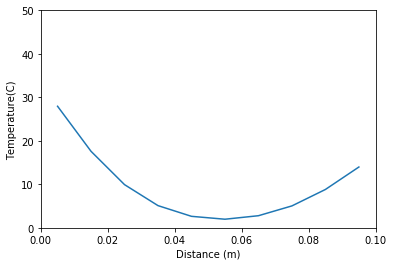

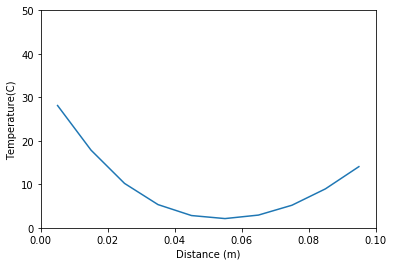

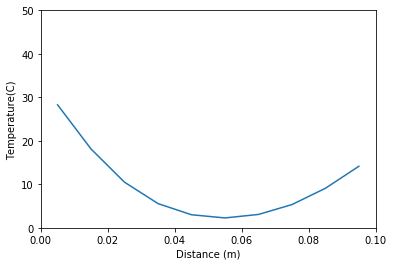

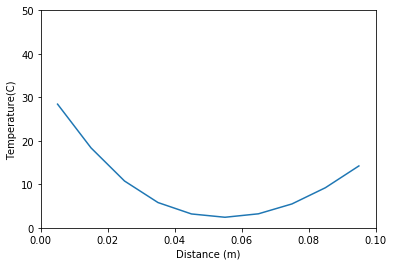

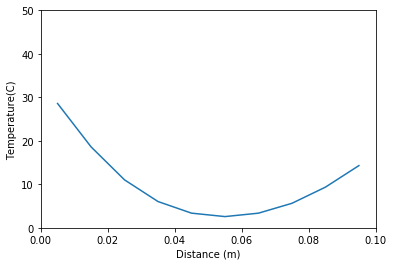

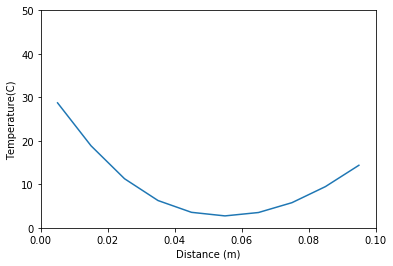

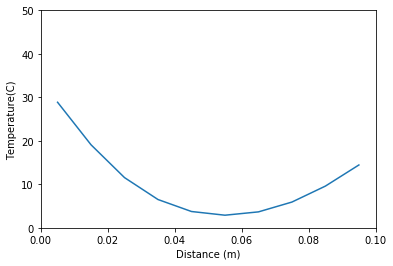

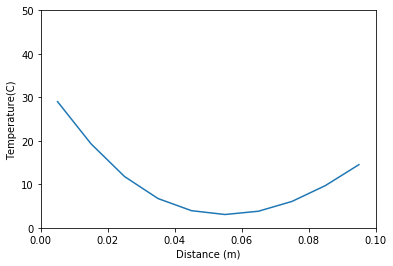

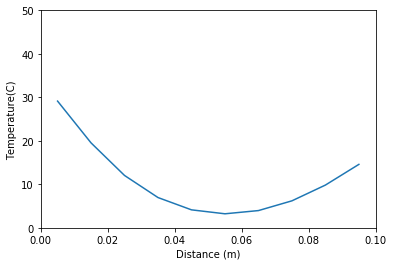

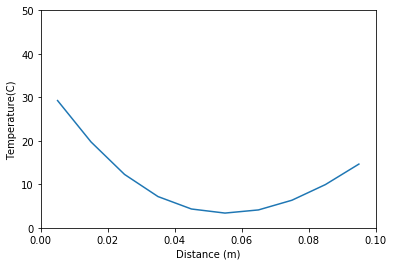

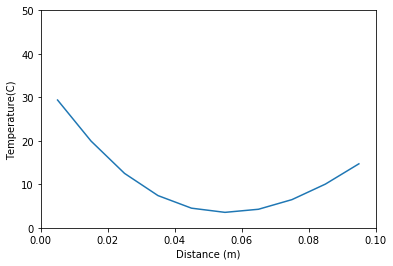

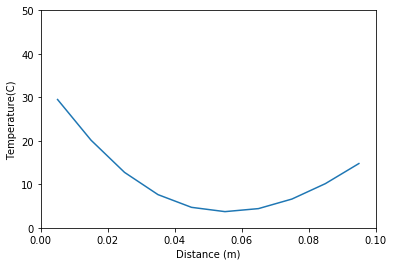

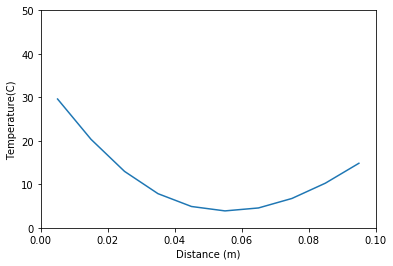

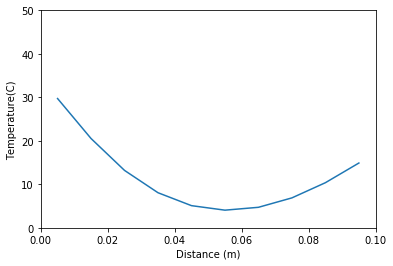

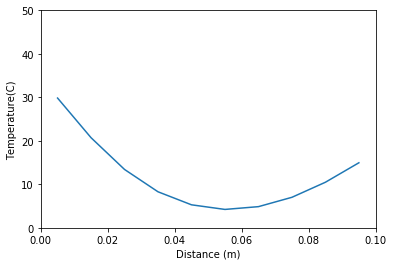

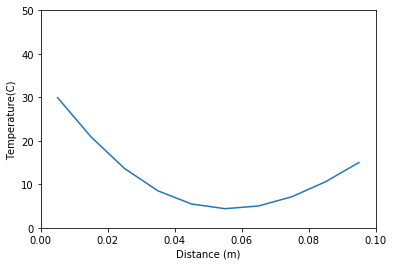

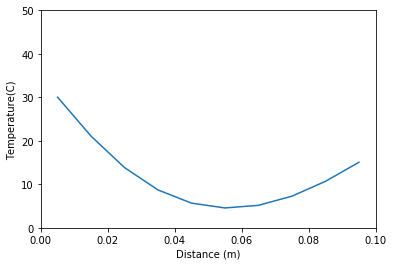

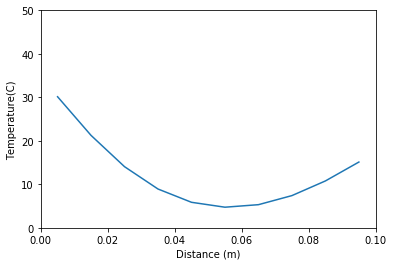

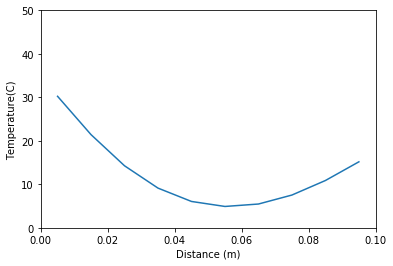

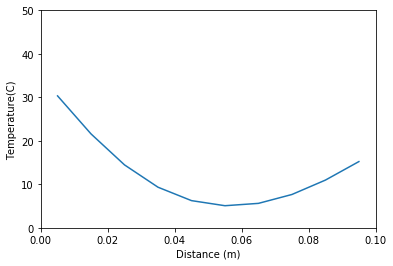

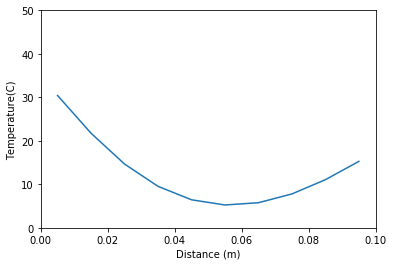

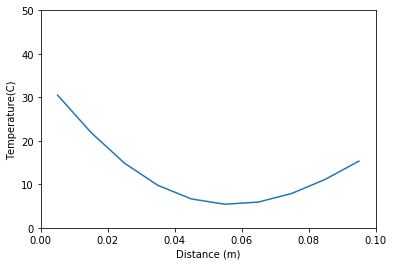

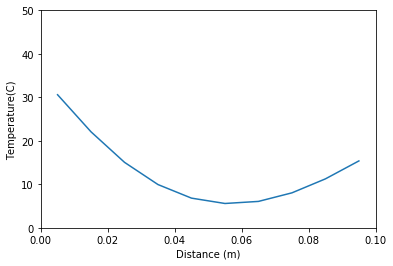

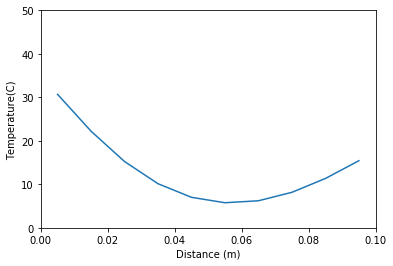

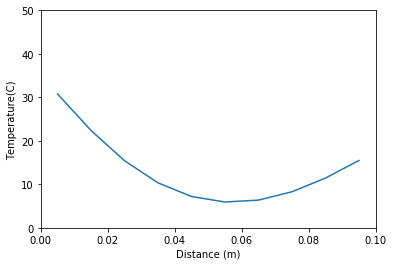

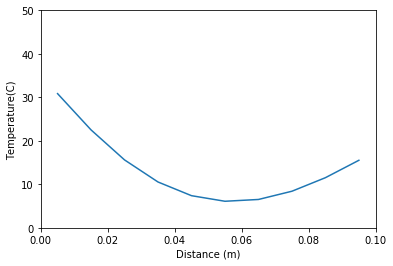

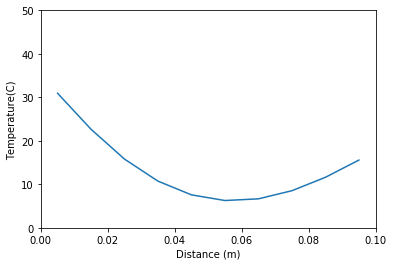

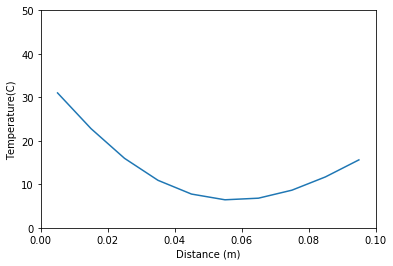

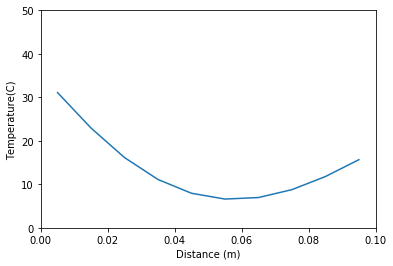

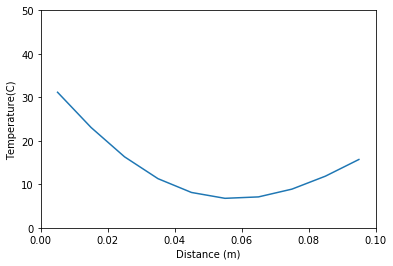

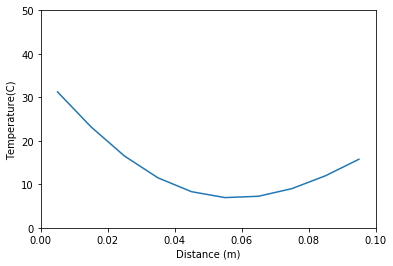

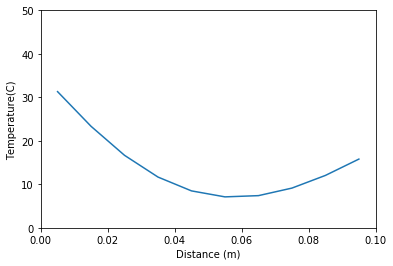

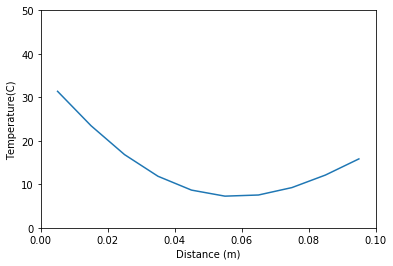

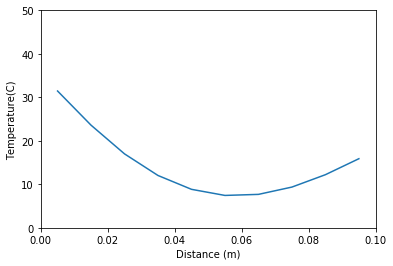

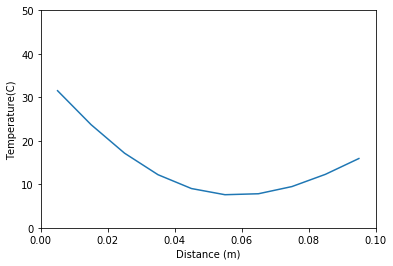

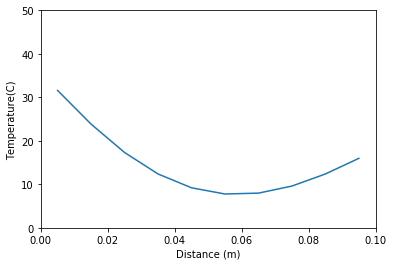

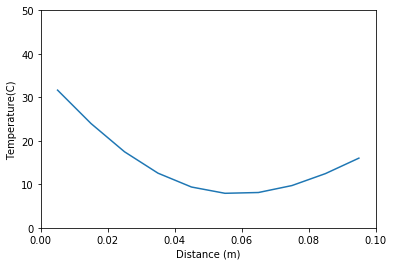

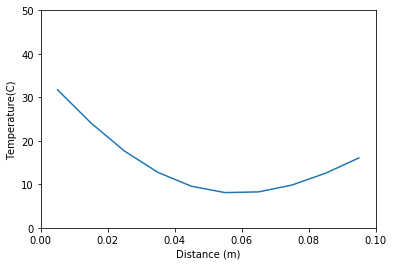

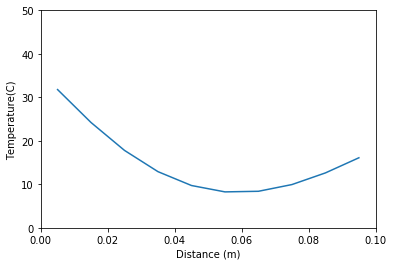

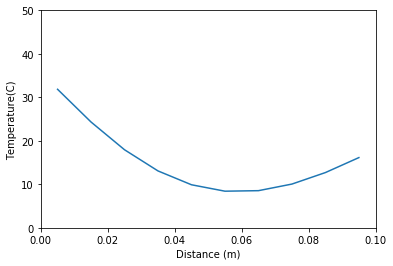

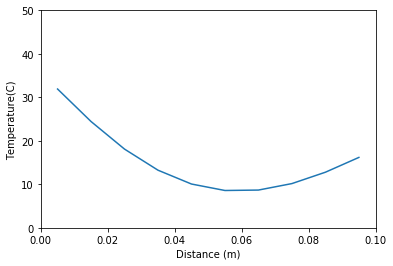

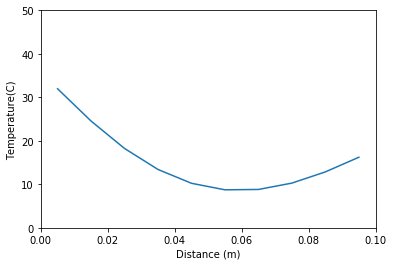

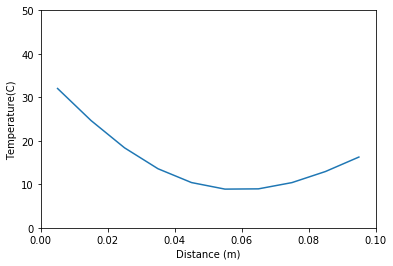

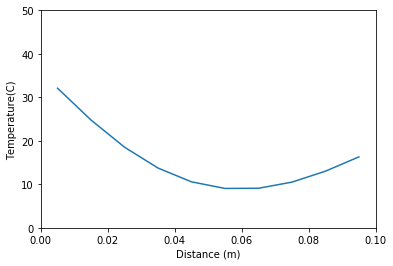

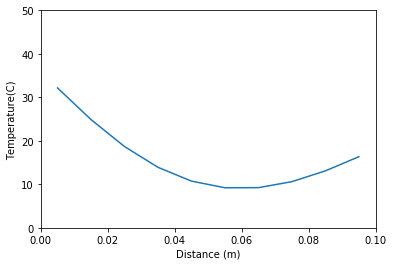

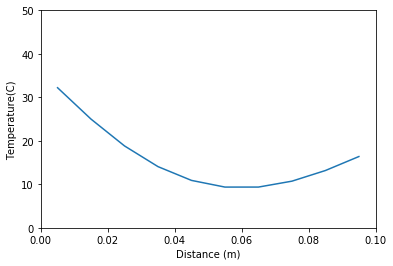

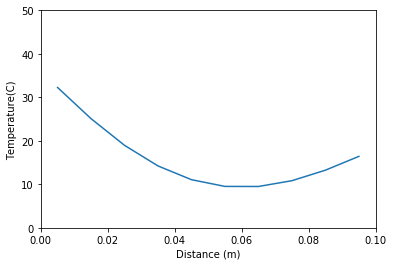

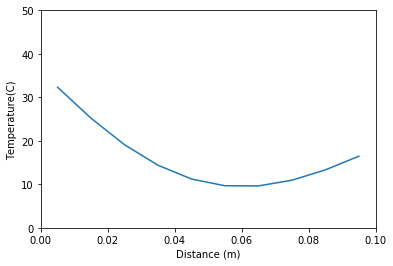

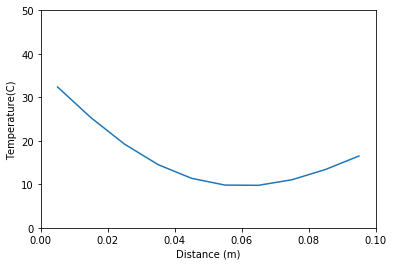

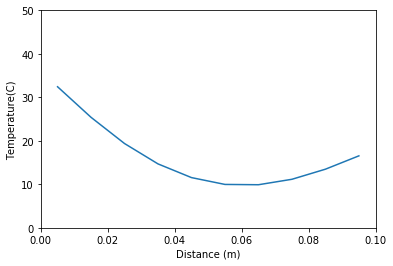

KeyboardInterrupt: 

In [124]:

for j in range(1,len(t)):
    plt.clf()
    
    for i in range(1,n-1):
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2+(T[i+1]-T[i])/dx**2)
    dTdt[0] = alpha*(-(T[0]-T1s)/dx**2+(T[1]-T[0])/dx**2)
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2+(T2s-T[n-1])/dx**2)
    T= T + dTdt*dt
    plt.figure(1)
    plt.plot(x,T)
    plt.axis([0,L, 0, 50])
    plt.xlabel("Distance (m)")
    plt.ylabel("Temperature(C)")
    plt.show() 

# 境界値問題の数値的解法

①反復法による逐次近似解法  
　ヤコビ法、ガウスザイデル法、逐次加速緩和法（SOR）など  
 　収束速度は　SOR >>　ガウスザイデル　>　ヤコビ法
 
②ガウスの消去法  

## 例　２次元定常熱伝導
熱源のない定常２次元熱伝導の場合  
解くべき方程式　→　ラプラス方程式

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Set maximum iteration
maxIter =100

# Set Dimension and delta
lenX = lenY = 10 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 50
Tbottom = 5
Tleft = 10
Tright = 10

# Initial guess of interior grid
Tguess = 20

In [116]:
# Set colour interpolation and colour map.
# You can try set it to 10, or 100 to see the difference
# You can also try: colourMap = plt.cm.coolwarm
colorinterpolation = 50
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

In [117]:
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

In [118]:
# Iteration (We assume that the iteration is convergence in maxIter = 500)
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")

Please wait for a moment
Iteration finished


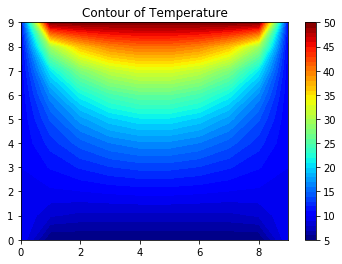

In [119]:
# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")

In [ ]:
from IPython.display import HTML
HTML("<h1>Hello world!</h1>")

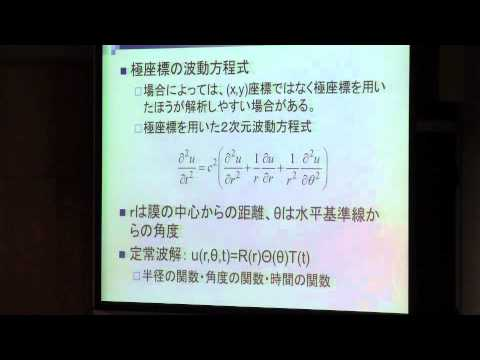

In [23]:
#偏微分方程式について
#慶應大学 理工学部 講義 数値計算法 第十一回　偏微分方程式
IPython.display.YouTubeVideo('HbPbwhRV4Cs')

In [ ]:
import math 
from numpy import * 
from matplotlib.pyplot import *

%matplotlib inline

R = 8.314           #[J/(mol*K)] Universal gas consmath.tant
T = 298.15          #[K] Temperature
g_a_0 = 2.          #[kj/mol] Gibb's free energy of the pure species 'a'
g_b_0 = 1.          #[kj/mol] Gibb's free energy of the pure species 'b'

for a in range(4):
    def f(x): 
        return  x*g_a_0 + (1-x)*g_b_0 + (R*T)/1000*(x*log(x) + (1-x)*log(1-x) + x*a*(1-x)**(2) + (1-x)*a*(x)**(2))
 
    x=linspace(0.000001,0.990001,100)
    a = f(x)        
    plot(x,a)
    
xlabel(" mole fraction of species a,x_a");
ylabel(" gibb''s free energy per mole of mixture,g_mixture kJ/mol");
annotate("A = 0",xy=(.7,0))
annotate("A = 1",xy=(.6,0.5))
annotate("A = 2",xy=(.6,0.95))
annotate("A = 3",xy=(.6,1.50))
suptitle("Calculated values of the molar Gibbs energy of a binary mixture at 25  C, assuming \
the symmetrical activity coefficient equation, with various values of A.")

show()
print (" The plot is shown in the graphic window. ")

参考

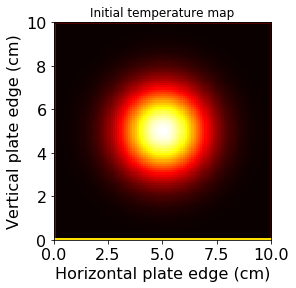

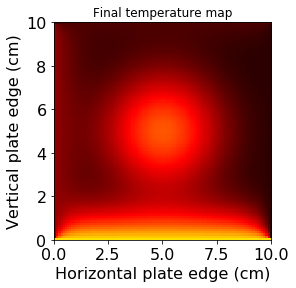

In [2]:
#The following code sample describes the solving a
#partial differential equation numerically.  The equation evaluated in
#this case is the 2D heat equation.  Look at a square copper plate with
#dimensions of 10 cm on a side.

#STEP 1.  Import the libraries needed to perform the calculations.

#Import the numeric Python and plotting libraries needed to solve the equation.
import numpy as np
import matplotlib.pyplot as plt

#STEP 2.  Set up the position and time grids (or axes).

#Set up the position information.
axis_size = 100     #Size of the 1D grid.
side_length = 10    #Length of one side of the square plate (cm)
dx = side_length/axis_size   #Space step
axis_points = np.linspace(0,10,axis_size)   #Spatial grid points for the plate.

#Set up the time grid to calcuate the equation.
T = 1.0                                       #Total time (s)
k = 1.011                                     #Thermal diffusivity of the plate in units of cm^2/s.
dt = ((1/axis_size)**2)/(2*k)                 #Time step size to ensure a stable discretization scheme.
n = int(T/dt)                                 #Total number of time steps.

#Set maximum initial temperature (in degrees Celsius)
max_temp = 100

#STEP 3.  Initialization conditions for the 2D heat equation.
#Set up initial temperature in the plate.  The initial temperature will be a Gaussian,
#With the hottest temperature at the middle of the plate and it will be cooler at the edges.

#Function to calculate the initial temperature of the plate.  It will be hottest at the plate center,
#at the maximum initial temperature.
def temp_init(x,y,c,m_temp):
    return m_temp*np.exp(-((x-side_length/2)**2 + (y-side_length/2)**2)/c**2)

#Create a meshgrid for the 3D function of initial temperature.
X, Y = np.meshgrid(axis_points, axis_points)

#denominator in the Gaussian (proportional to standard deviation).
c = 2

#Calculate the initial plate temperature using the temperature initialization function.  This is the initial
#condition of the plate.
U = temp_init(X, Y, c, max_temp)

#Set up some boundary conditions at the edges of the plate for the initial plate condition at t = 0.
#Set plate edge temperatures in degrees Celsius.  The bottom edge is set to be quite hot in this case.
U[:,0] = 20
U[:,-1] = 5
U[0,:] = 10
U[-1,:] = 70

#Assign initial boundary conditions to their own variables.
B1 = U[:,0]
B2 = U[:,-1]
B3 = U[0,:]
B4 = U[-1,:]

#Plot the results of the equation.  Use the hot colormap to show
#the initial heat distribution.
plt.imshow(U, cmap ='hot', vmin = 0, vmax = max_temp, extent= [0,10,0,10])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Horizontal plate edge (cm)', fontsize = 16)
plt.ylabel('Vertical plate edge (cm)', fontsize = 16)
plt.title('Initial temperature map')
plt.show()


#STEP 4.  Laplacian numerical approximation using 5-point stencil finite difference methods.
def laplacian(Z,d_ex):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / d_ex**2


#STEP 5.   Now solve the PDE for a result of all spatial positions
#after time T has elapsed.  Iterate over the specified time.

for i in range(n):

    #Perform the 3rd order differentiation on the function.
    deltaU = laplacian(U,dx)

    #Take the values of the function inside, but not including
    #the first and last elements.
    Uc = U[1:-1,1:-1]

    #Update the variables after rearranging the differential equation.
    U[1:-1,1:-1] = Uc + dt * (k*deltaU)

    #Direchlet boundary conditions.  The edges of the plate
    #have steady state, constant temperatures over all time.
    U[:,0] = B1
    U[:,-1] = B2
    U[0,:] = B3
    U[-1,:] = B4

#STEP 6.   Show the new temperature distribution on the plate after the
#time has elapsed.  Use the hot colormap to show the heat distribution.
plt.imshow(U,cmap = 'hot', vmin = 0, vmax = max_temp, extent= [0,10,0,10])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Horizontal plate edge (cm)', fontsize = 16)
plt.ylabel('Vertical plate edge (cm)', fontsize = 16)
plt.title('Final temperature map')
plt.show()

# 次回　機械学習（非深層学習）
　Skitlearn
